# Cats or Dogs???
## Coded in Keras

## Load Packages

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras import regularizers
import h5py

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

Using TensorFlow backend.


## Load datasets

In [2]:
# Check training set groups in a h5 file 
a = h5py.File('datasets/train_catVdog.h5', "r")
list(a)

['list_classes', 'train_set_x', 'train_set_y']

In [3]:
# Check test set groups in a h5 file
b = h5py.File('datasets/test_catVdog.h5', "r")
list(b)

['list_classes', 'test_set_x', 'test_set_y']

In [4]:
# dataset constant
DATAPATH_TRAIN = 'train_catVdog'
DATAPATH_TEST = 'test_catVdog'

In [5]:
def load_dataset():
    train_dataset = h5py.File('datasets/'+ DATAPATH_TRAIN +'.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/'+ DATAPATH_TEST +'.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    #train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    #test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [6]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

In [7]:
X_train_orig.shape

(23922, 128, 128, 3)

In [8]:
Y_train_orig.shape

(1, 23922)

In [9]:
X_test_orig.shape

(2000, 128, 128, 3)

In [10]:
Y_test_orig.shape

(1, 2000)

## Data processing and check shape

In [11]:
# Data processing
# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

In [12]:
# check the shape of each dataset
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 23922
number of test examples = 2000
X_train shape: (23922, 128, 128, 3)
Y_train shape: (23922, 1)
X_test shape: (2000, 128, 128, 3)
Y_test shape: (2000, 1)


## Build CNN model in Keras

### Adopting the LeNet-5 model - but with max pooling instead of average pooling and 3 Conv layers

In [21]:
def model(input_shape):
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (2, 2), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool_0')(X)
    
    # CONV the 2nd time
    X = Conv2D(64, (5,5), strides = (1,1), name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    # MAXPOOL 2nd time
    X = MaxPooling2D((2, 2), name='max_pool_1')(X)
    
    # CONV the 3rd time
    X = Conv2D(128, (3,3), strides = (1,1), name = 'conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    # MAXPOOL 3rd time
    X = MaxPooling2D((2, 2), name='max_pool_2')(X)
    
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED + L2 Regularization
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', activity_regularizer=regularizers.l2(0.01), name='fully_connected_1')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='CatVSDog')
 
    return model

## Create the model

In [22]:
maoWoofModel = model(X_train.shape[1:])

In [23]:
# Testing of values
X_train.shape

(23922, 128, 128, 3)

In [24]:
# Testing of values
X_train.shape[1:]

(128, 128, 3)

## Compile the model

In [25]:
maoWoofModel.compile('adam','binary_crossentropy',metrics=['accuracy'])

## Train the model

In [26]:
EPOCHS = 5

In [27]:
models = maoWoofModel.fit(X_train,Y_train, epochs = EPOCHS, batch_size = 32)

Epoch 1/5
23922/23922 [==============================] - 1683s 70ms/step - loss: 0.7486 - accuracy: 0.6294
Epoch 2/5
23922/23922 [==============================] - 1618s 68ms/step - loss: 0.6565 - accuracy: 0.7071
Epoch 3/5
23922/23922 [==============================] - 1627s 68ms/step - loss: 0.5981 - accuracy: 0.7477
Epoch 4/5
23922/23922 [==============================] - 1628s 68ms/step - loss: 0.5568 - accuracy: 0.7824
Epoch 5/5
23922/23922 [==============================] - 1649s 69ms/step - loss: 0.5215 - accuracy: 0.8037


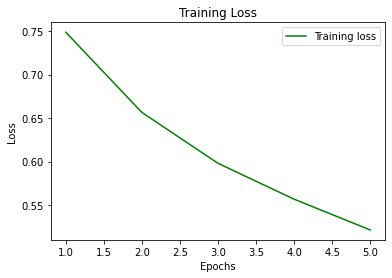

In [28]:
loss_train = models.history['loss']
#loss_val = history.history['loss']
epochs = range(1,EPOCHS+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
#plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
preds = maoWoofModel.evaluate(X_test,Y_test,batch_size=128,verbose=1,sample_weight = None)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

2000/2000 [==============================] - 167s 84ms/step

Loss = 0.7806966691017151
Test Accuracy = 0.7609999775886536


0


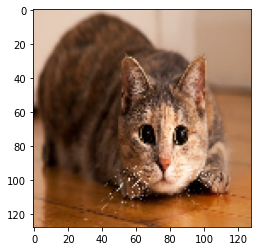

In [49]:
### START CODE HERE ###
img_path = 'images/cat10.jpg'
### END CODE HERE ###
img = image.load_img(img_path, target_size=(128, 128))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(int(maoWoofModel.predict(x)[0][0]))

In [30]:
maoWoofModel.summary()

Model: "CatVSDog"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 134, 134, 3)       0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool_0 (MaxPooling2D)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 28, 28, 64)        512

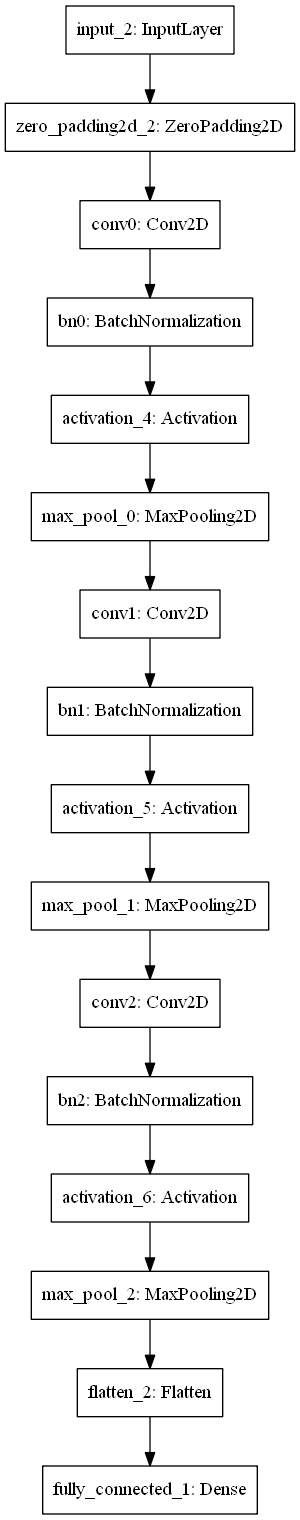

In [31]:
plot_model(maoWoofModel, to_file='HappyModel.png')
#SVG(model_to_dot(maoWoofModel).create(prog='dot', format='svg'))